In [63]:
import mne
from BCI2kReader import BCI2kReader as b2k
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt 

In [87]:
import glob
import os
df_normal = pd.DataFrame([], )
label = 0
for filename in glob.glob('./dataset/normal/*.dat'):
    with b2k.BCI2kReader(filename) as test:
        my_states = test.read(-1)
        my_signals, stateslice = test[100:600]
        raw = pd.DataFrame(my_signals)
        #raw_fix = pd.concat([raw, raw])
        #raw_fix = pd.DataFrame.transpose(raw)
        
        df_normal = df_normal.append(raw)
        
        #df.append(data_extraction_all(raw))
df_normal.reset_index(drop=True, inplace=True)    

In [96]:
data = df_normal.to_numpy()

In [98]:
data.shape

(144, 500)

In [77]:
my_signals.shape

(1, 500, 16)

In [78]:
my_signals

array([[[-20.657999 , -11.055    , -26.334    , ...,  14.091    ,
          30.723    ,  27.522    ],
        [-22.308    ,  -9.801    , -22.077    , ...,  20.064    ,
          35.706    ,  34.947    ],
        [-23.793    , -10.3619995, -17.16     , ...,  23.43     ,
          39.039    ,  39.402    ],
        ...,
        [  2.6069999,  18.216    ,  23.925    , ...,  11.847    ,
          21.615    ,  33.329998 ],
        [  1.8149999,  19.14     ,  26.697    , ...,  12.342    ,
          22.143    ,  37.422    ],
        [  6.732    ,  21.318    ,  33.       , ...,  13.893    ,
          23.892    ,  40.557    ]]], dtype=float32)

ValueError: x and y can be no greater than 2D, but have shapes (1,) and (1, 500, 16)

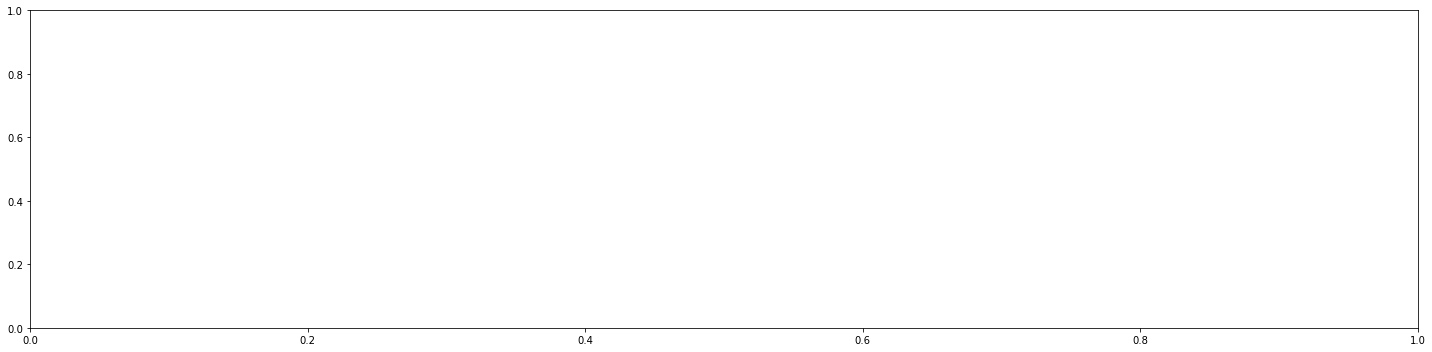

In [79]:
plt.figure(figsize = (20,5))
plt.plot(my_signals)

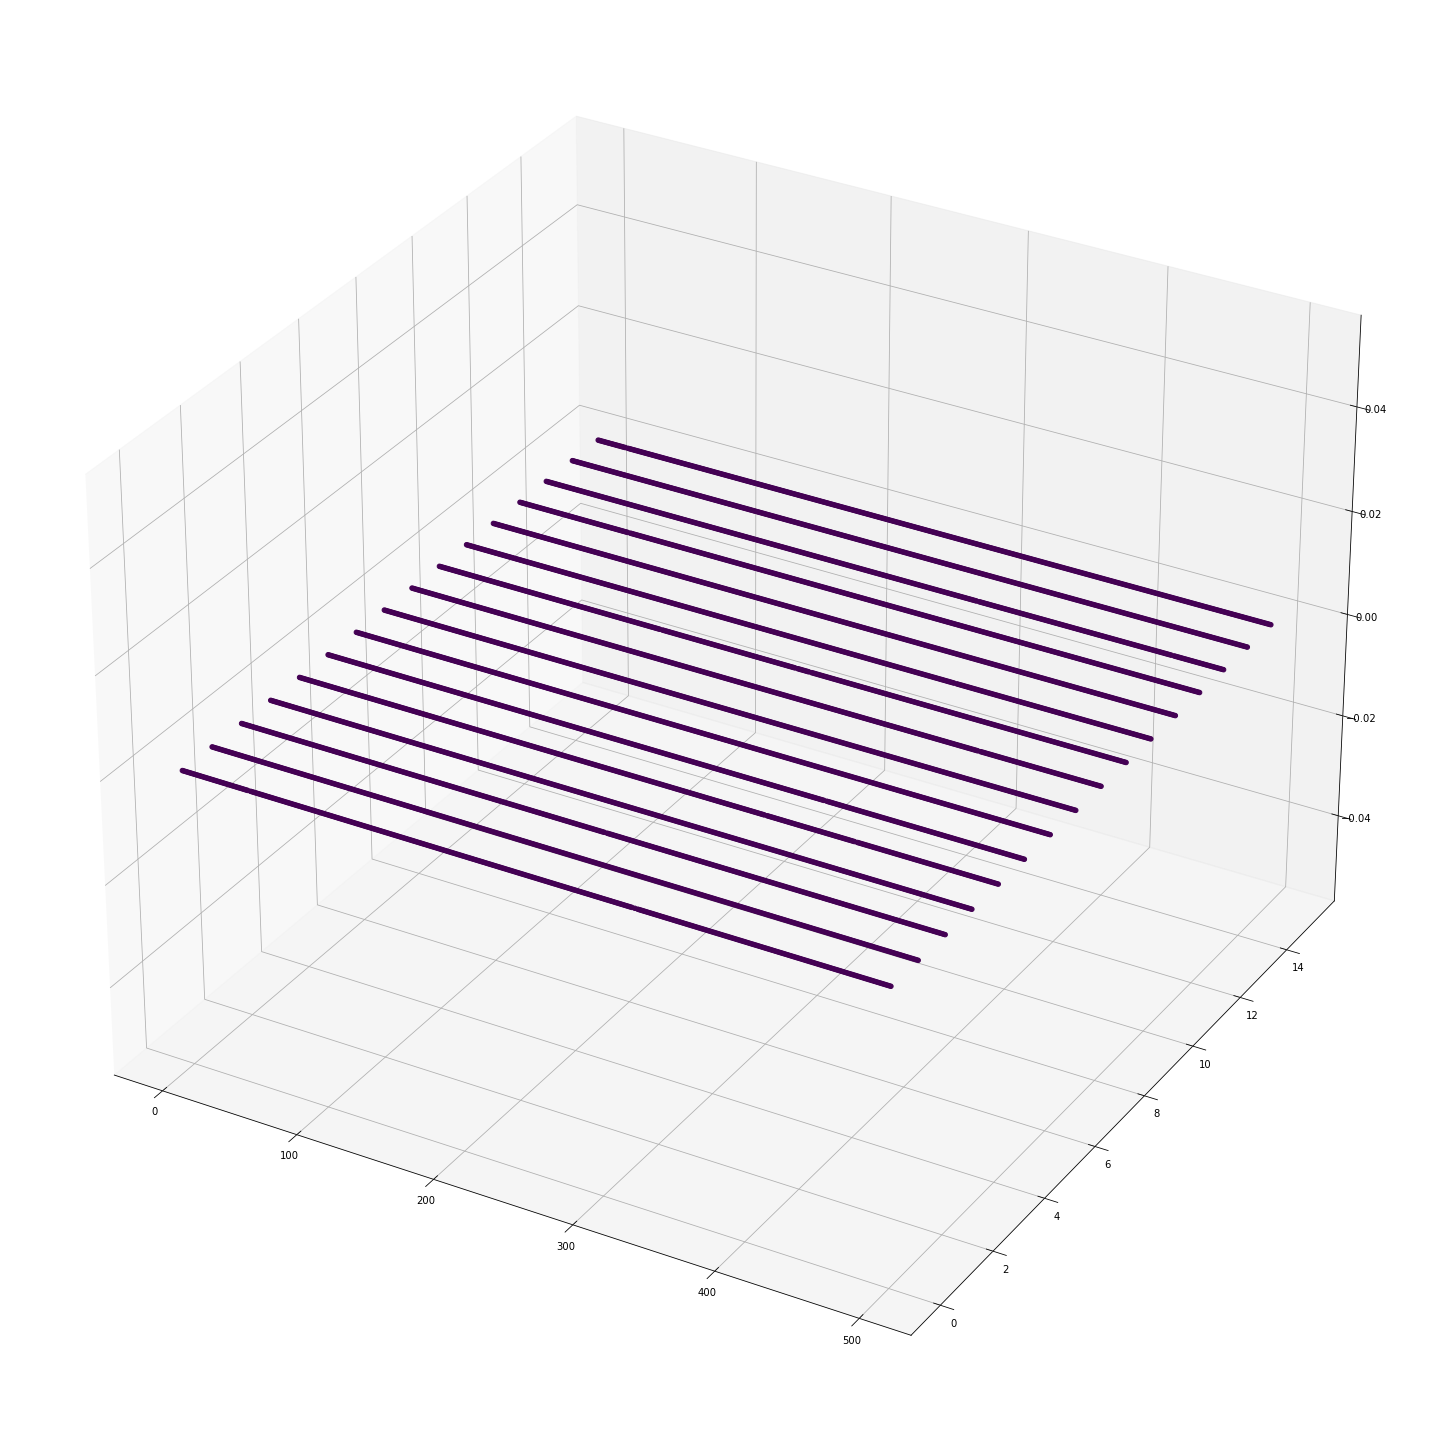

In [80]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [20, 20]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
data = my_signals
z, x, y = data.nonzero()
ax.scatter(x, y, z, c=z, alpha=1)
plt.show()